In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import pearsonr

import joblib

In [2]:
def regression_error (y_test, y_pred):
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    
    print(f"MAE: {MAE}")
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"r2: {r2}")

In [3]:
n_df = pd.read_excel("nitrate phosphate chlorophyll a inflow.xlsx",sheet_name='Nitrate')
p_df = pd.read_excel("nitrate phosphate chlorophyll a inflow.xlsx",sheet_name='Phosphate')
c_df = pd.read_excel("nitrate phosphate chlorophyll a inflow.xlsx",sheet_name='Chlorophyll a')
i_df = pd.read_excel("nitrate phosphate chlorophyll a inflow.xlsx",sheet_name='inflow')

In [4]:
n_df.head()

,Dates,Year,Month,Season,SEG 6,SEG 5,SEG 4,SEG 3,SEG 2,SEG 1
0,2015-01-01 05:00:00,2015,Jan,Winter,9.600,9.000,9.500,9.400,10.500,9.600
1,2015-01-02 05:00:00,2015,Jan,Winter,9.610,9.149,9.454,9.405,10.429,10.077
2,2015-01-03 04:59:00,2015,Jan,Winter,9.627,9.252,9.430,9.407,10.370,10.182
3,2015-01-04 05:00:00,2015,Jan,Winter,9.644,9.335,9.417,9.408,10.318,10.221
4,2015-01-05 05:01:00,2015,Jan,Winter,9.665,9.422,9.413,9.409,10.265,10.235


In [5]:
p_df.head()

,Dates,Year,Month,Season,SEG 6,SEG 5,SEG 4,SEG 3,SEG 2,SEG 1
0,2015-01-01 05:00:00,2015,Jan,Winter,5.068,3.875,2.083,4.165,2.243,1.750
1,2015-01-02 05:00:00,2015,Jan,Winter,1.917,3.571,2.262,4.023,2.359,2.053
2,2015-01-03 04:59:00,2015,Jan,Winter,1.849,3.190,2.363,3.915,2.448,2.166
3,2015-01-04 05:00:00,2015,Jan,Winter,1.876,2.898,2.422,3.822,2.523,2.240
4,2015-01-05 05:01:00,2015,Jan,Winter,1.910,2.624,2.453,3.729,2.593,2.301


In [6]:
c_df.head()

,Dates,Year,Month,Season,SEG 6,SEG 5,SEG 4,SEG 3,SEG 2,SEG 1
0,2015-01-01 05:00:00,2015,Jan,Winter,54.000,60.000,66.000,52.000,34.000,16.000
1,2015-01-02 05:00:00,2015,Jan,Winter,52.820,49.383,58.869,47.901,31.847,23.769
2,2015-01-03 04:59:00,2015,Jan,Winter,53.170,41.204,52.266,43.943,29.665,24.038
3,2015-01-04 05:00:00,2015,Jan,Winter,53.585,35.411,46.252,40.225,27.555,23.039
4,2015-01-05 05:01:00,2015,Jan,Winter,54.600,31.216,40.719,36.822,25.602,21.722


In [7]:
i_df.head()

,Dates,Year,Month,Season,SEG 6,SEG 5,SEG 4,SEG 3,SEG 2,SEG 1
0,2015-01-01 05:00:00,2015,Jan,Winter,6.027,6.027,6.027,6.027,6.027,6.027
1,2015-01-02 05:00:00,2015,Jan,Winter,5.066,5.183,5.372,5.510,5.600,5.659
2,2015-01-03 04:59:00,2015,Jan,Winter,4.977,4.971,4.964,4.966,4.973,4.980
3,2015-01-04 05:00:00,2015,Jan,Winter,4.700,4.736,4.795,4.837,4.865,4.882
4,2015-01-05 05:01:00,2015,Jan,Winter,9.381,8.902,8.036,7.342,6.870,6.547


In [8]:
n_df = n_df.add_prefix('n_')
c_df = c_df.add_prefix('c_')
p_df = p_df.add_prefix('p_')
i_df = i_df.add_prefix('i_')

print(n_df.columns)
print(c_df.columns)
print(p_df.columns)
print(i_df.columns)

Index(['n_Dates', 'n_Year', 'n_Month', 'n_Season', 'n_SEG 6', 'n_SEG 5',
       'n_SEG 4', 'n_SEG 3', 'n_SEG 2', 'n_SEG 1'],
      dtype='object')
Index(['c_Dates', 'c_Year', 'c_Month', 'c_Season', 'c_SEG 6', 'c_SEG 5',
       'c_SEG 4', 'c_SEG 3', 'c_SEG 2', 'c_SEG 1'],
      dtype='object')
Index(['p_Dates', 'p_Year', 'p_Month', 'p_Season', 'p_SEG 6', 'p_SEG 5',
       'p_SEG 4', 'p_SEG 3', 'p_SEG 2', 'p_SEG 1'],
      dtype='object')
Index(['i_Dates', 'i_Year', 'i_Month', 'i_Season', 'i_SEG 6', 'i_SEG 5',
       'i_SEG 4', 'i_SEG 3', 'i_SEG 2', 'i_SEG 1'],
      dtype='object')


In [9]:
n_seg = n_df.drop(columns=['n_Dates','n_Year','n_Month','n_Season']).columns.to_list()
c_seg = c_df.drop(columns=['c_Dates','c_Year','c_Month','c_Season']).columns.to_list()
p_seg = p_df.drop(columns=['p_Dates','p_Year','p_Month','p_Season']).columns.to_list()
i_seg = i_df.drop(columns=['i_Dates','i_Year','i_Month','i_Season']).columns.to_list()

print(n_seg)
print(c_seg)
print(p_seg)
print(i_seg)

['n_SEG 6', 'n_SEG 5', 'n_SEG 4', 'n_SEG 3', 'n_SEG 2', 'n_SEG 1']
['c_SEG 6', 'c_SEG 5', 'c_SEG 4', 'c_SEG 3', 'c_SEG 2', 'c_SEG 1']
['p_SEG 6', 'p_SEG 5', 'p_SEG 4', 'p_SEG 3', 'p_SEG 2', 'p_SEG 1']
['i_SEG 6', 'i_SEG 5', 'i_SEG 4', 'i_SEG 3', 'i_SEG 2', 'i_SEG 1']


In [10]:
print(len(n_df), len(c_df), len(p_df), len(i_df))

2192 2192 2192 2192


In [11]:
df = pd.concat([n_df[['n_Season']], 
                n_df[n_seg], 
                p_df[p_seg], 
                c_df[c_seg], 
                i_df[i_seg]], axis=1)
df.head()

,n_Season,n_SEG 6,n_SEG 5,n_SEG 4,n_SEG 3,n_SEG 2,n_SEG 1,p_SEG 6,p_SEG 5,p_SEG 4,...,c_SEG 4,c_SEG 3,c_SEG 2,c_SEG 1,i_SEG 6,i_SEG 5,i_SEG 4,i_SEG 3,i_SEG 2,i_SEG 1
0,Winter,9.600,9.000,9.500,9.400,10.500,9.600,5.068,3.875,2.083,...,66.000,52.000,34.000,16.000,6.027,6.027,6.027,6.027,6.027,6.027
1,Winter,9.610,9.149,9.454,9.405,10.429,10.077,1.917,3.571,2.262,...,58.869,47.901,31.847,23.769,5.066,5.183,5.372,5.510,5.600,5.659
2,Winter,9.627,9.252,9.430,9.407,10.370,10.182,1.849,3.190,2.363,...,52.266,43.943,29.665,24.038,4.977,4.971,4.964,4.966,4.973,4.980
3,Winter,9.644,9.335,9.417,9.408,10.318,10.221,1.876,2.898,2.422,...,46.252,40.225,27.555,23.039,4.700,4.736,4.795,4.837,4.865,4.882
4,Winter,9.665,9.422,9.413,9.409,10.265,10.235,1.910,2.624,2.453,...,40.719,36.822,25.602,21.722,9.381,8.902,8.036,7.342,6.870,6.547


In [12]:
df.rename(columns = {'n_Season':'Season'}, inplace = True)
df.columns

Index(['Season', 'n_SEG 6', 'n_SEG 5', 'n_SEG 4', 'n_SEG 3', 'n_SEG 2',
       'n_SEG 1', 'p_SEG 6', 'p_SEG 5', 'p_SEG 4', 'p_SEG 3', 'p_SEG 2',
       'p_SEG 1', 'c_SEG 6', 'c_SEG 5', 'c_SEG 4', 'c_SEG 3', 'c_SEG 2',
       'c_SEG 1', 'i_SEG 6', 'i_SEG 5', 'i_SEG 4', 'i_SEG 3', 'i_SEG 2',
       'i_SEG 1'],
      dtype='object')

In [13]:
Season = list(df['Season'].unique())
Season

['Winter', 'Summer', 'Southwest Monsoon', 'Northeast monsoon']

In [14]:
def df_corr (col,lst1,lst2,dataframe,seasons):
    
    df_temp = pd.DataFrame(columns=col, index=lst2)
    
    for S in seasons:
        dataframe_seasonal = dataframe[dataframe['Season'] == S]
        for i in lst1:
            for j in lst2:
                if i[-1] == j[-1]:
                    # Convert dataframe into series
                    list1 = dataframe_seasonal[i] 
                    list2 = dataframe_seasonal[j]
                    # Apply the pearsonr()
                    corr, _ = pearsonr(list1, list2)
                    df_temp[S].loc[j] = corr
    return df_temp

In [15]:
# Nitrate-Chlorophyll
nc = df_corr(col=Season, 
        lst1=n_seg, lst2=c_seg,
        dataframe=df, seasons=Season)
nc

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_SEG 6,-0.124005,0.553337,0.253103,-0.679176
c_SEG 5,0.205077,0.616249,0.596581,0.474238
c_SEG 4,0.222734,0.51898,0.622239,0.59605
c_SEG 3,-0.050709,0.276268,0.346679,-0.32123
c_SEG 2,0.24303,0.300765,0.536144,0.526022
c_SEG 1,-0.055177,0.104143,0.275294,-0.232497


In [16]:
# Nitrate-inflow
ni = df_corr(col=Season, 
        lst1=n_seg, lst2=i_seg,
        dataframe=df, seasons=Season)
ni

,Winter,Summer,Southwest Monsoon,Northeast monsoon
i_SEG 6,0.534995,0.537901,0.471824,0.259737
i_SEG 5,0.436473,0.342846,0.344435,0.240972
i_SEG 4,0.391862,0.120561,0.182156,0.207824
i_SEG 3,0.375892,-0.08592,0.037743,0.174318
i_SEG 2,0.375245,-0.214769,-0.063937,0.146425
i_SEG 1,0.386291,-0.245764,-0.079775,0.146753


In [17]:
# Phosphorus-Chlorophyll
pc = df_corr(col=Season, 
        lst1=p_seg, lst2=c_seg,
        dataframe=df, seasons=Season)
pc

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_SEG 6,0.240433,0.709625,0.459581,-0.520989
c_SEG 5,0.369061,0.671352,0.915006,0.675174
c_SEG 4,0.435358,0.556569,0.89521,0.756504
c_SEG 3,0.26163,0.215116,0.469515,-0.116113
c_SEG 2,0.430823,0.307613,0.708307,0.598912
c_SEG 1,0.047434,-0.029546,0.351601,-0.063294


In [18]:
# Phosphorus-inflow
pi = df_corr(col=Season,
        lst1=p_seg, lst2=i_seg,
        dataframe=df, seasons=Season)
pi

,Winter,Summer,Southwest Monsoon,Northeast monsoon
i_SEG 6,0.358199,0.559658,0.414163,0.290628
i_SEG 5,0.419515,0.379914,0.235513,0.25711
i_SEG 4,0.399327,0.149196,0.058005,0.208486
i_SEG 3,0.096643,-0.222591,-0.130567,0.12344
i_SEG 2,0.279264,-0.23442,-0.20548,0.11093
i_SEG 1,0.064819,-0.433735,-0.269512,0.057029


Text(0.5, 1.0, 'Phosphorus-Inflow')

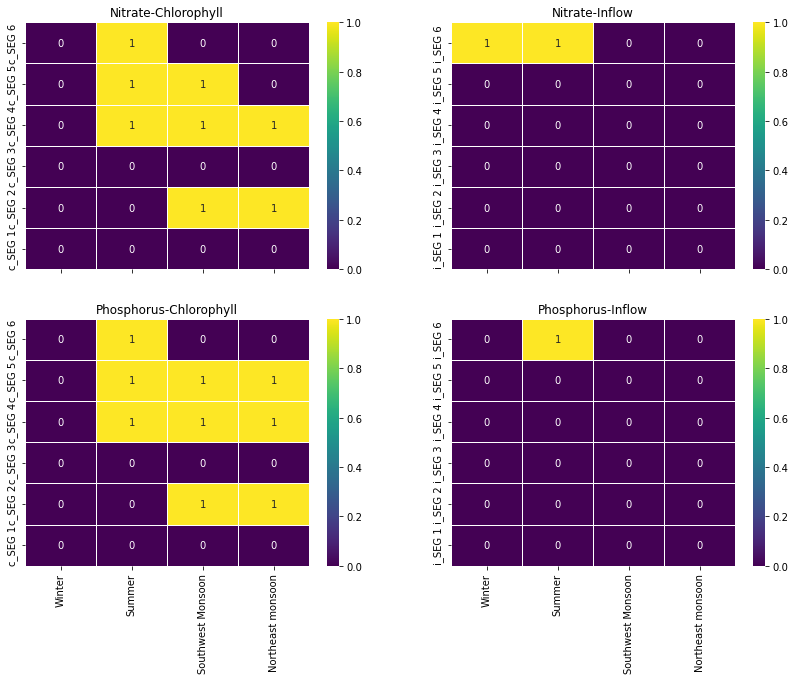

In [19]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(14,10))
sns.heatmap(ax=axes[0,0], data=nc>=0.5, annot=True, cmap='viridis',linewidths=1)
axes[0,0].set_title('Nitrate-Chlorophyll')
sns.heatmap(ax=axes[0,1], data=ni>=0.5, annot=True, cmap='viridis',linewidths=1)
axes[0,1].set_title('Nitrate-Inflow')
sns.heatmap(ax=axes[1,0], data=pc>=0.5, annot=True, cmap='viridis',linewidths=1)
axes[1,0].set_title('Phosphorus-Chlorophyll')
sns.heatmap(ax=axes[1,1], data=pi>=0.5, annot=True, cmap='viridis',linewidths=1)
axes[1,1].set_title('Phosphorus-Inflow')

In [20]:
df['n_mean'] = df.filter(regex='n_',axis=1).mean(axis=1)
df['c_mean'] = df.filter(regex='c_',axis=1).mean(axis=1)
df['i_mean'] = df.filter(regex='i_',axis=1).mean(axis=1)
df['p_mean'] = df.filter(regex='p_',axis=1).mean(axis=1)

In [21]:
df.filter(regex='mean',axis=1)

,n_mean,c_mean,i_mean,p_mean
0,9.600000,47.000000,6.027000,3.197333
1,9.687333,44.098167,5.398333,2.697500
2,9.711333,40.714333,4.971833,2.655167
3,9.723833,37.677833,4.802500,2.630167
4,9.734833,35.113500,7.846333,2.601667
...,...,...,...,...
2187,10.849500,16.188167,11.269667,1.336333
2188,10.697333,15.817833,10.001833,1.310667
2189,10.253333,14.352000,7.616000,1.243333
2190,9.719000,12.601500,6.374333,1.167167


In [22]:
df_final = pd.concat([df[['Season']], df.filter(regex='mean',axis=1)], axis=1)
df_final.head()

,Season,n_mean,c_mean,i_mean,p_mean
0,Winter,9.600000,47.000000,6.027000,3.197333
1,Winter,9.687333,44.098167,5.398333,2.697500
2,Winter,9.711333,40.714333,4.971833,2.655167
3,Winter,9.723833,37.677833,4.802500,2.630167
4,Winter,9.734833,35.113500,7.846333,2.601667


In [23]:
# Nitrate_mean-Chlorophyll_mean
mean_nc = df_corr(col=Season, 
        lst1=['n_mean'], lst2=['c_mean'],
        dataframe=df, seasons=Season)
mean_nc

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_mean,0.036749,0.479311,0.467673,-0.182091


In [24]:
# Nitrate_mean-inflow_mean
mean_ni = df_corr(col=Season, 
        lst1=['n_mean'], lst2=['i_mean'],
        dataframe=df, seasons=Season)
mean_ni

,Winter,Summer,Southwest Monsoon,Northeast monsoon
i_mean,0.428045,0.100458,0.159731,0.204795


In [25]:
# Phosphate_mean-Chlorophyll_mean
mean_pc = df_corr(col=Season, 
        lst1=['p_mean'], lst2=['c_mean'],
        dataframe=df, seasons=Season)
mean_pc

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_mean,0.271701,0.573195,0.723546,0.154205


In [26]:
# Phosphate_mean-inflow_mean
mean_pi = df_corr(col=Season, 
        lst1=['p_mean'], lst2=['i_mean'],
        dataframe=df, seasons=Season)
mean_pi

,Winter,Summer,Southwest Monsoon,Northeast monsoon
i_mean,0.309319,0.084617,0.015284,0.198415


In [27]:
n_corr = pd.concat([mean_nc,mean_ni])
n_corr

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_mean,0.036749,0.479311,0.467673,-0.182091
i_mean,0.428045,0.100458,0.159731,0.204795


In [28]:
p_corr = pd.concat([mean_pc,mean_pi])
p_corr

,Winter,Summer,Southwest Monsoon,Northeast monsoon
c_mean,0.271701,0.573195,0.723546,0.154205
i_mean,0.309319,0.084617,0.015284,0.198415


In [29]:
Season

['Winter', 'Summer', 'Southwest Monsoon', 'Northeast monsoon']

In [30]:
df_Winter = df_final[df_final['Season'] == 'Winter']
df_Summer = df_final[df_final['Season'] == 'Summer']
df_SW = df_final[df_final['Season'] == 'Southwest Monsoon']
df_NE = df_final[df_final['Season'] == 'Northeast monsoon']

# RF

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.metrics import r2_score

def regression_error (y_test, y_pred):
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    
    MAE = mean_absolute_error(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    
    print(f"MAE: {MAE}")
    print(f"MSE: {MSE}")
    print(f"RMSE: {RMSE}")
    print(f"r2: {r2}")

def rf (X,y,test_size,file_dir,file_name):
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    # Creating Pipeline
    pipeline = Pipeline([( "scaler" , StandardScaler()),
                       ("rf",RandomForestRegressor())])
    
    # make lists of different parameters to check    
    param_grid = {'rf__n_estimators':[64,100,128,200],
                  'rf__max_features':[1,2], 
                  'rf__bootstrap':[True, False],
                  'rf__oob_score':[True]}
    
    # initialize
    grid_model = GridSearchCV(estimator=pipeline,param_grid=param_grid)
    
    # fit
    grid_model.fit(X_train,y_train)
    
    # model score
    print('Training set score: ' + str(grid_model.score(X_train, y_train)))
    print('Test set score: ' + str(grid_model.score(X_test, y_test)))
    
    # Prediction
    y_pred = grid_model.predict(X_test)
    
    # Error metrics
    regression_error(y_test,y_pred)
    
    # Plot
    res = pd.DataFrame(y_test)
    res['y_pred'] = y_pred
    res = res.reset_index(drop=True)
    plt.figure(figsize=(6,4),dpi=150)
    res.plot()
    plt.savefig(os.path.join(file_dir,file_name[:-4]+'.jpeg'))
    
    # Access the best set of parameters
    best_params = grid_model.best_params_
    print(best_params)
    # Stores the optimum model in best_pipe
    best_pipe = grid_model.best_estimator_
    print(best_pipe)
    
#     # Result dataframe
#     result_df = pd.DataFrame.from_dict(grid_model.cv_results_, orient='columns')
#     print(result_df.columns)
#     return result_df

    # Outputs
    # Save the model
    file_path = os.path.join(file_dir,file_name)
    joblib.dump(grid_model.best_estimator_, file_path, compress = 1)
    
    best_params_df = pd.DataFrame(pd.Series(grid_model.best_params_), columns=[file_name[:-4]]).transpose()
    best_params_df['r2_score'] = r2_score(y_test,y_pred)
    return best_params_df

# SUMMER Nitrogin-Chlorophyll

(496, 1) (496,)
(56, 1) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8812503341403625
Test set score: 0.16384347561223855
MAE: 6.128569868276903
MSE: 75.53474502392446
RMSE: 8.691072719976773
r2: 0.16384347561223855
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SUMMER_nc,True,1,200,True,0.163843


<Figure size 900x600 with 0 Axes>

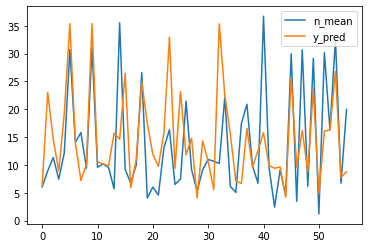

In [32]:
X = df_Summer[['c_mean']]
y = df_Summer['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_SUMMER_nc.pkl"

RF_SUMMER_nc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SUMMER_nc_best_params_df

# SUMMER Phosphate-Chlorophyll

(496, 1) (496,)
(56, 1) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8982089972819403
Test set score: -0.028043618971073547
MAE: 0.5971871460761405
MSE: 0.5860171036369738
RMSE: 0.7655175397317646
r2: -0.028043618971073547
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 100, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_features=1, oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SUMMER_pc,True,1,100,True,-0.028044


<Figure size 900x600 with 0 Axes>

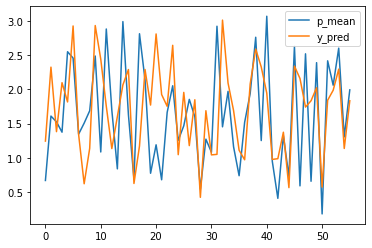

In [33]:
X = df_Summer[['c_mean']]
y = df_Summer['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_SUMMER_pc.pkl"

RF_SUMMER_pc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SUMMER_pc_best_params_df

# WINTER Nitrogin-Chlorophyll

(320, 1) (320,)
(36, 1) (36,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.9035295869430447
Test set score: 0.14277062900787518
MAE: 4.721417896412033
MSE: 75.31927495363107
RMSE: 8.678667809844496
r2: 0.14277062900787518
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 64, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=64,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_WINTER_nc,True,1,64,True,0.142771


<Figure size 900x600 with 0 Axes>

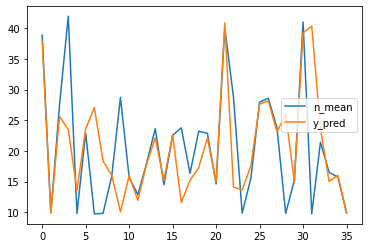

In [34]:
X = df_Winter[['c_mean']]
y = df_Winter['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_WINTER_nc.pkl"

RF_WINTER_nc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_WINTER_nc_best_params_df

# WINTER Phosphate-Chlorophyll

(320, 1) (320,)
(36, 1) (36,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8546301780983303
Test set score: -0.18040314306024618
MAE: 0.43815194444444533
MSE: 0.44107601836874966
RMSE: 0.664135542166469
r2: -0.18040314306024618
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_WINTER_pc,True,1,200,True,-0.180403


<Figure size 900x600 with 0 Axes>

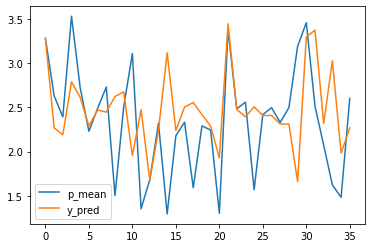

In [35]:
X = df_Winter[['c_mean']]
y = df_Winter['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_WINTER_pc.pkl"

RF_WINTER_pc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_WINTER_pc_best_params_df

# SW Nitrogin-Chlorophyll

(658, 1) (658,)
(74, 1) (74,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8816735799610788
Test set score: 0.1573057886762531
MAE: 4.898896982481305
MSE: 41.256283098142305
RMSE: 6.423105409234875
r2: 0.1573057886762531
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SW_nc,True,1,200,True,0.157306


<Figure size 900x600 with 0 Axes>

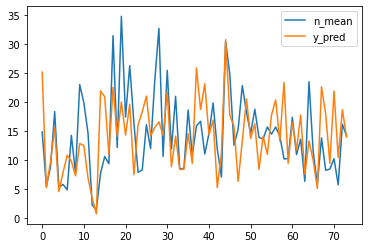

In [36]:
X = df_SW[['c_mean']]
y = df_SW['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_SW_nc.pkl"

RF_SW_nc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SW_nc_best_params_df

# SW Phosphate-Chlorophyll

(658, 1) (658,)
(74, 1) (74,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.9373194027721492
Test set score: 0.5797338727558712
MAE: 0.32078197182713974
MSE: 0.1766232303307537
RMSE: 0.4202656663715866
r2: 0.5797338727558712
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 100, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(max_features=1, oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SW_pc,True,1,100,True,0.579734


<Figure size 900x600 with 0 Axes>

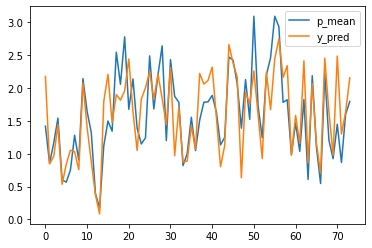

In [37]:
X = df_SW[['c_mean']]
y = df_SW['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_SW_pc.pkl"

RF_SW_pc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SW_pc_best_params_df

# NE Nitrogin-Chlorophyll

(496, 1) (496,)
(56, 1) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8317359817265815
Test set score: -0.010051048844779809
MAE: 7.242768322172621
MSE: 91.81521471890503
RMSE: 9.582025606253879
r2: -0.010051048844779809
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 64, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=64,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_NE_nc,True,1,64,True,-0.010051


<Figure size 900x600 with 0 Axes>

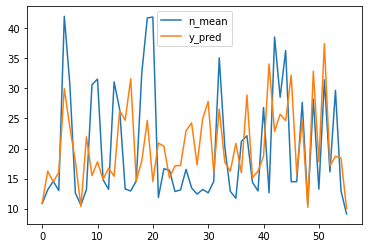

In [38]:
X = df_NE[['c_mean']]
y = df_NE['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_NE_nc.pkl"

RF_NE_nc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_NE_nc_best_params_df

# NE Phosphate-Chlorophyll

(496, 1) (496,)
(56, 1) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\AKSHAYA\Anacon

Training set score: 0.8189337590012817
Test set score: -0.08029957523277331
MAE: 0.5138893694196435
MSE: 0.4397342671059511
RMSE: 0.6631246241137114
r2: -0.08029957523277331
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 128, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=128,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_NE_pc,True,1,128,True,-0.0803


<Figure size 900x600 with 0 Axes>

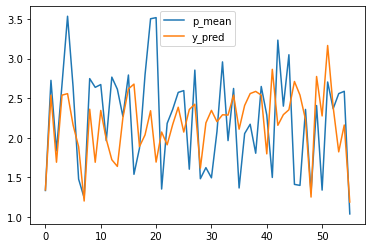

In [39]:
X = df_NE[['c_mean']]
y = df_NE['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npc")
file_name = "RF_NE_pc.pkl"

RF_NE_pc_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_NE_pc_best_params_df

# SUMMER Nitrogin-Chlorophyll-inflow

(496, 2) (496,)
(56, 2) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9441183024768566
Test set score: 0.7724038449656407
MAE: 2.944485894158299
MSE: 20.56004711741448
RMSE: 4.534318815149027
r2: 0.7724038449656407
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 128, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=128,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SUMMER_nci,True,1,128,True,0.772404


<Figure size 900x600 with 0 Axes>

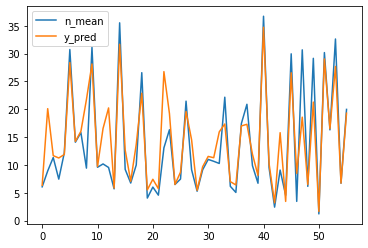

In [40]:
X = df_Summer[['c_mean','i_mean']]
y = df_Summer['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_SUMMER_nci.pkl"

RF_SUMMER_nci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SUMMER_nci_best_params_df

# SUMMER Phosphate-Chlorophyll-inflow

(496, 2) (496,)
(56, 2) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9688364259157146
Test set score: 0.7796863074437632
MAE: 0.23993850496116037
MSE: 0.12558571408924363
RMSE: 0.3543807473456249
r2: 0.7796863074437632
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SUMMER_pci,True,1,200,True,0.779686


<Figure size 900x600 with 0 Axes>

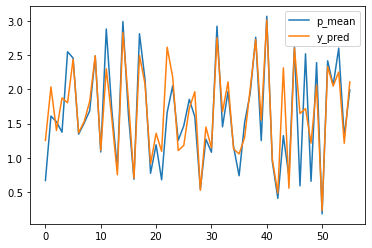

In [41]:
X = df_Summer[['c_mean','i_mean']]
y = df_Summer['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_SUMMER_pci.pkl"

RF_SUMMER_pci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SUMMER_pci_best_params_df

# WINTER Nitrogin-Chlorophyll-inflow

(320, 2) (320,)
(36, 2) (36,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.96322078863466
Test set score: 0.6596990981029884
MAE: 2.595578631365743
MSE: 29.900068831385283
RMSE: 5.468095539708984
r2: 0.6596990981029884
{'rf__bootstrap': True, 'rf__max_features': 2, 'rf__n_estimators': 64, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=2, n_estimators=64,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_WINTER_nci,True,2,64,True,0.659699


<Figure size 900x600 with 0 Axes>

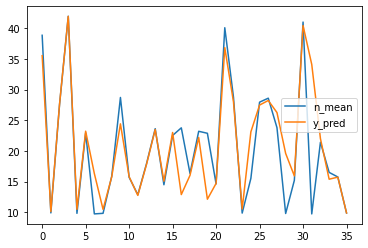

In [42]:
X = df_Winter[['c_mean','i_mean']]
y = df_Winter['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_WINTER_nci.pkl"

RF_WINTER_nci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_WINTER_nci_best_params_df

# WINTER Phosphate-Chlorophyll-inflow

(320, 2) (320,)
(36, 2) (36,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9617396117166953
Test set score: 0.6535619820648914
MAE: 0.20190494791666622
MSE: 0.12945196093448577
RMSE: 0.3597943314374002
r2: 0.6535619820648914
{'rf__bootstrap': True, 'rf__max_features': 2, 'rf__n_estimators': 64, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=2, n_estimators=64,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_WINTER_pci,True,2,64,True,0.653562


<Figure size 900x600 with 0 Axes>

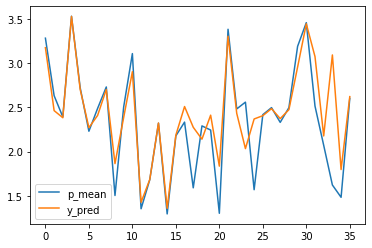

In [43]:
X = df_Winter[['c_mean','i_mean']]
y = df_Winter['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_WINTER_pci.pkl"

RF_WINTER_pci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_WINTER_pci_best_params_df

# SW Nitrogin-Chlorophyll-inflow

(658, 2) (658,)
(74, 2) (74,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9452863336374848
Test set score: 0.5634618696584972
MAE: 3.01306012857716
MSE: 21.371857604446877
RMSE: 4.622970647153935
r2: 0.5634618696584972
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SW_nci,True,1,200,True,0.563462


<Figure size 900x600 with 0 Axes>

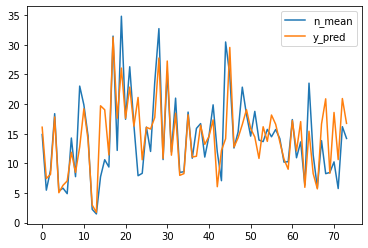

In [44]:
X = df_SW[['c_mean','i_mean']]
y = df_SW['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_SW_nci.pkl"

RF_SW_nci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SW_nci_best_params_df

# SW Phosphate-Chlorophyll-inflow

(658, 2) (658,)
(74, 2) (74,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9759745641489407
Test set score: 0.6730913890328736
MAE: 0.21981147648235425
MSE: 0.1373883145676717
RMSE: 0.3706592971553144
r2: 0.6730913890328736
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SW_pci,True,1,200,True,0.673091


<Figure size 900x600 with 0 Axes>

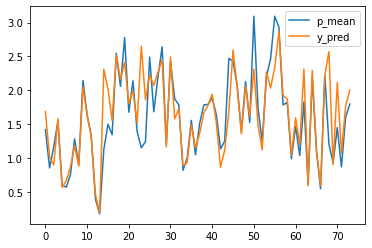

In [45]:
X = df_SW[['c_mean','i_mean']]
y = df_SW['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_SW_pci.pkl"

RF_SW_pci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_SW_pci_best_params_df

# NE Nitrogin-Chlorophyll-inflow

(496, 2) (496,)
(56, 2) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.912058661973606
Test set score: 0.6337445458206694
MAE: 3.7345730794270833
MSE: 33.29319167175391
RMSE: 5.770025274793336
r2: 0.6337445458206694
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 128, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=128,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_NE_nci,True,1,128,True,0.633745


<Figure size 900x600 with 0 Axes>

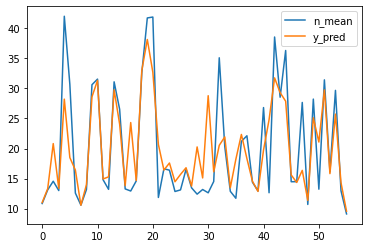

In [46]:
X = df_NE[['c_mean','i_mean']]
y = df_NE['n_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_NE_nci.pkl"

RF_NE_nci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_NE_nci_best_params_df

# NE Phosphate-Chlorophyll-inflow

(496, 2) (496,)
(56, 2) (56,)


C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AKSHAYA\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only avai

Training set score: 0.9070556729180842
Test set score: 0.47698804049697674
MAE: 0.3518996726190481
MSE: 0.212891207191444
RMSE: 0.46140135152754375
r2: 0.47698804049697674
{'rf__bootstrap': True, 'rf__max_features': 1, 'rf__n_estimators': 200, 'rf__oob_score': True}
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_features=1, n_estimators=200,
                                       oob_score=True))])


,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_NE_pci,True,1,200,True,0.476988


<Figure size 900x600 with 0 Axes>

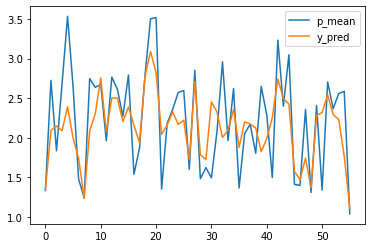

In [47]:
X = df_NE[['c_mean','i_mean']]
y = df_NE['p_mean']

file_dir = os.path.join(os.getcwd(), "SVR_RF_npci")
file_name = "RF_NE_pci.pkl"

RF_NE_pci_best_params_df = rf(X=X,y=y,test_size=0.10,file_dir=file_dir,file_name=file_name)
RF_NE_pci_best_params_df

In [48]:
result_df = pd.concat([RF_SUMMER_nc_best_params_df, 
                       RF_SUMMER_pc_best_params_df, 
                       RF_WINTER_nc_best_params_df,
                       RF_WINTER_pc_best_params_df, 
                       RF_SW_nc_best_params_df, 
                       RF_SW_pc_best_params_df, 
                       RF_NE_nc_best_params_df, 
                       RF_NE_pc_best_params_df,
                       RF_SUMMER_nci_best_params_df, 
                       RF_SUMMER_pci_best_params_df,
                       RF_WINTER_nci_best_params_df, 
                       RF_WINTER_pci_best_params_df, 
                       RF_SW_nci_best_params_df,
                       RF_SW_pci_best_params_df,
                       RF_NE_nci_best_params_df,
                       RF_NE_pci_best_params_df])

result_df

,rf__bootstrap,rf__max_features,rf__n_estimators,rf__oob_score,r2_score
RF_SUMMER_nc,True,1,200,True,0.163843
RF_SUMMER_pc,True,1,100,True,-0.028044
RF_WINTER_nc,True,1,64,True,0.142771
RF_WINTER_pc,True,1,200,True,-0.180403
RF_SW_nc,True,1,200,True,0.157306
RF_SW_pc,True,1,100,True,0.579734
RF_NE_nc,True,1,64,True,-0.010051
RF_NE_pc,True,1,128,True,-0.080300
RF_SUMMER_nci,True,1,128,True,0.772404
RF_SUMMER_pci,True,1,200,True,0.779686


In [49]:
result_df.to_csv("RF_result.csv")

In [50]:
# Load the model
# file_path = 
# loaded_model = joblib.load(file_path)

In [51]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=42)

In [52]:
# loaded_model.predict(X_test)

In [53]:
# param = loaded_model.get_params

In [54]:
# print(loaded_model.get_params)